## 1. Dataset



In [6]:
# Отключаем ворнинги
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# Matplotlib 
import matplotlib.pyplot as plt
# Seaborn library
import seaborn as sns
sns.set()

%matplotlib inline

Загрузка данных в `DataFrame`:

In [7]:
df = pd.read_csv("4L telecom_churn.csv")

In [8]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Описание метрик:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | Штат (like KS = Kansas) | String | Categorical |
| **Account length** | Время жизни аккаунта | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | Международные звонки (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Кол-во voicemail сообщений | Numerical | Quantitative |
| **Total day minutes** |  Общая длительность дневных звонков | Numerical | Quantitative |
| **Total day calls** | Общее кол-во дневных звонков  | Numerical | Quantitative |
| **Total day charge** | Суммарная стоимость дневного обслуживания | Numerical | Quantitative |
| **Total eve minutes** |Общая длительность вечерних звонков | Numerical | Quantitative |
| **Total eve calls** | Общее кол-во вечерних звонков | Numerical | Quantitative |
| **Total eve charge** | Суммарная стоимость вечернего обслуживания | Numerical | Quantitative |
| **Total night minutes** | Общая длительность ночных звонков | Numerical | Quantitative |
| **Total night calls** | Общее кол-во ночных звонков | Numerical | Quantitative |
| **Total night charge** |Суммарная стоимость ночного обслуживания | Numerical | Quantitative |
| **Total intl minutes** |Общая длительность международных звонков  | Numerical | Quantitative |
| **Total intl calls** | Общее кол-во международных звонков | Numerical | Quantitative |
| **Total intl charge** |Суммарная стоимость международного обслуживания | Numerical | Quantitative |
| **Customer service calls** | Кол-во обращений в служду поддержки | Numerical | Categorical/Ordinal |

Последний столбец данных ** Churn ** - наша целевая переменная. Он является двоичным: * True * указывает, что компания в конечном итоге потеряла этого клиента, а * False * указывает, что клиент был сохранен.

## 2. Одномерная визуализация



#### 2.1 Количественные характеристики



##### Histograms 

Самый простой способ взглянуть на распределение числовой переменной - построить ее * гистограмму * с помощью метода DataFrame.[`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

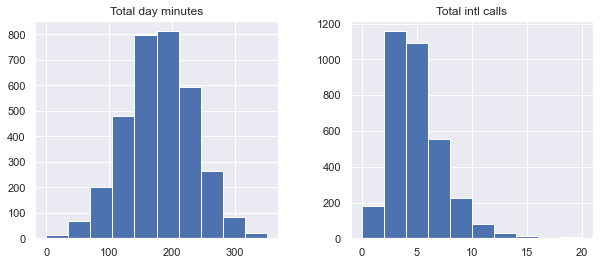

In [28]:
features = ["Total day minutes", "Total intl calls"]
fg = df[features].hist(figsize=(10, 4));

Существует также другой, часто более ясный способ понять распределение: * графики плотности * или, более формально, * графики плотности ядра *. Их можно считать [сглаженной] (https://en.wikipedia.org/wiki/Kernel_smoother) версией гистограммы.

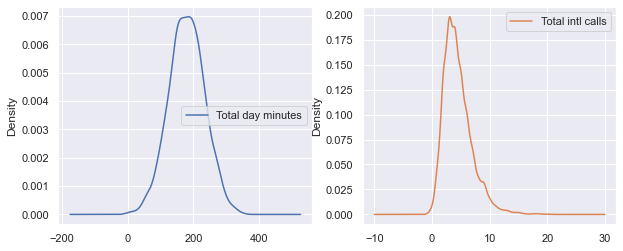

In [10]:
df[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

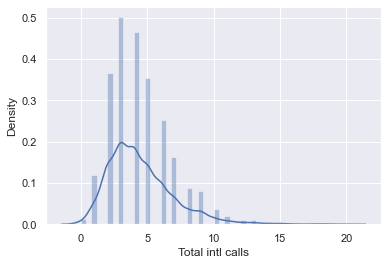

In [11]:
sns.distplot(df["Total intl calls"]);



##### Box plot



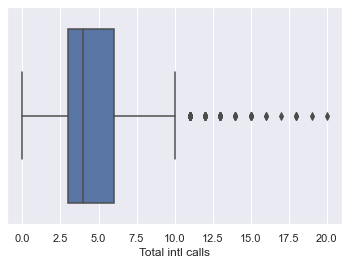

In [12]:
sns.boxplot(x="Total intl calls", data=df);

Давайте посмотрим, как интерпретировать коробчатую диаграмму. Его составляющими являются прямоугольник (очевидно, поэтому он называется box графиком), так называемые усы и ряд отдельных точек (выбросов).

Рамка сама по себе иллюстрирует межквартильный разброс распределения; его длина определяется 25-м (Q1) и 75-м (Q3) процентилями. Вертикальная линия внутри рамки отмечает медианное значение (50%) распределения.

Усы - это линии, идущие от коробки. Они представляют собой весь разброс точек данных, в частности точки, которые попадают в интервал (Q1−1,5⋅IQR, Q3 + 1,5⋅IQR), где IQR = Q3 − Q1 - межквартильный диапазон.

Выбросы, выходящие за пределы диапазона, ограниченного усами, отображаются индивидуально в виде черных точек вдоль центральной оси.

##### Violin plot



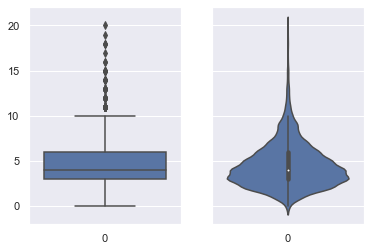

In [13]:
fig, (ax0,ax1) = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["Total intl calls"], ax=ax0)
sns.violinplot(data=df["Total intl calls"], ax=ax1);

#### 2.2 Категориальные и бинарные фичи



##### Таблица частот

Давайте проверим баланс классов в нашем наборе данных, посмотрев на распределение целевой переменной: * коэффициент оттока *.  (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html):

In [14]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

##### Bar plot

Гистограмма представляет собой графическое представление таблицы частот. Самый простой способ создать его - использовать функцию `seaborn` [` countplot () `] (https://seaborn.pydata.org/generated/seaborn.countplot.html). 

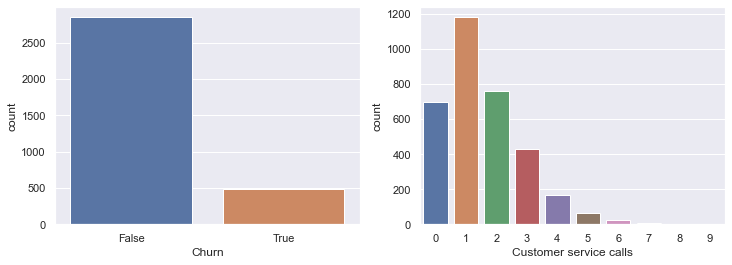

In [15]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x="Churn", data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1]);

## 3. Многомерная визуализация



#### 3.1 Количественные переменные vs Количественные переменные

##### Корреляционная матрица

Давайте посмотрим на корреляции между числовыми переменными в нашем наборе данных.



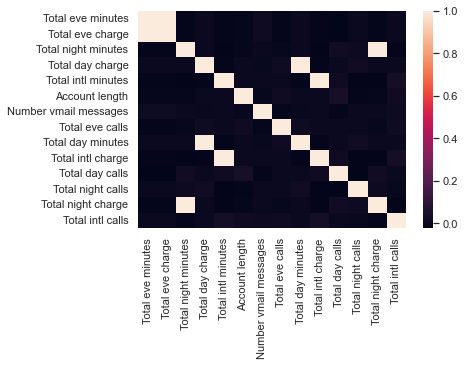

In [16]:
# Drop non-numerical variables
numerical = list(
    set(df.columns)
    - {
        "State",
        "International plan",
        "Voice mail plan",
        "Area code",
        "Churn",
        "Customer service calls",
    }
)

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [17]:
numerical = list(
    set(numerical)
    - {
        "Total day charge",
        "Total eve charge",
        "Total night charge",
        "Total intl charge",
    }
)

##### Scatter plot

отображает значения двух числовых переменных в виде * декартовых координат * в 2D-пространстве. Также возможны точечные графики в 3D.



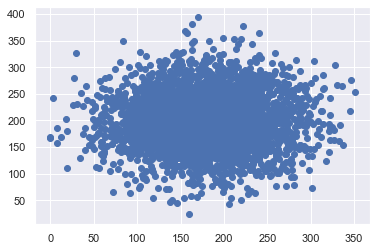

In [18]:
plt.scatter(df["Total day minutes"], df["Total night minutes"]);

We get an uninteresting picture of two normally distributed variables. Also, it seems that these features are uncorrelated because the ellipse-like shape is aligned with the axes.

Есть более интересный вариант для создания диаграммы с помощью библиотеки `seaborn`:

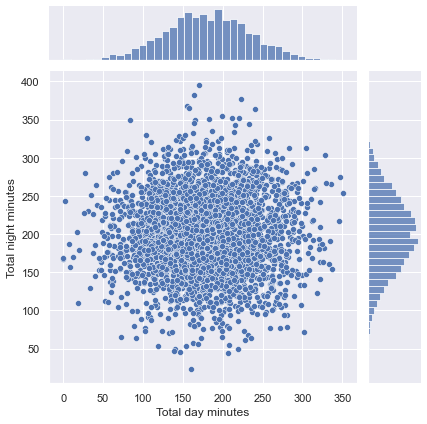

In [19]:
sns.jointplot(x="Total day minutes", y="Total night minutes", data=df, kind="scatter");

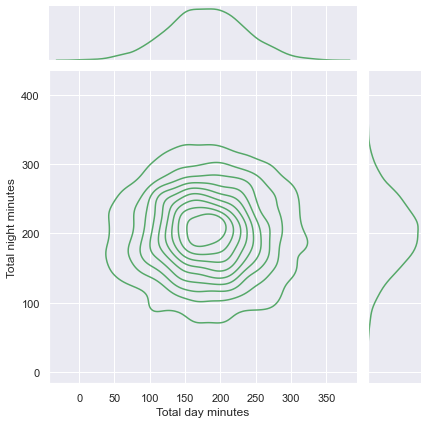

In [20]:
sns.jointplot(
    "Total day minutes", "Total night minutes", data=df, kind="kde", color="g"
);


##### Scatterplot matrix


В некоторых случаях нам может потребоваться построить * Scatterplot matrix *, например, показанную ниже. Его диагональ содержит распределения соответствующих переменных, а диаграммы разброса для каждой пары переменных заполняют остальную часть матрицы. 

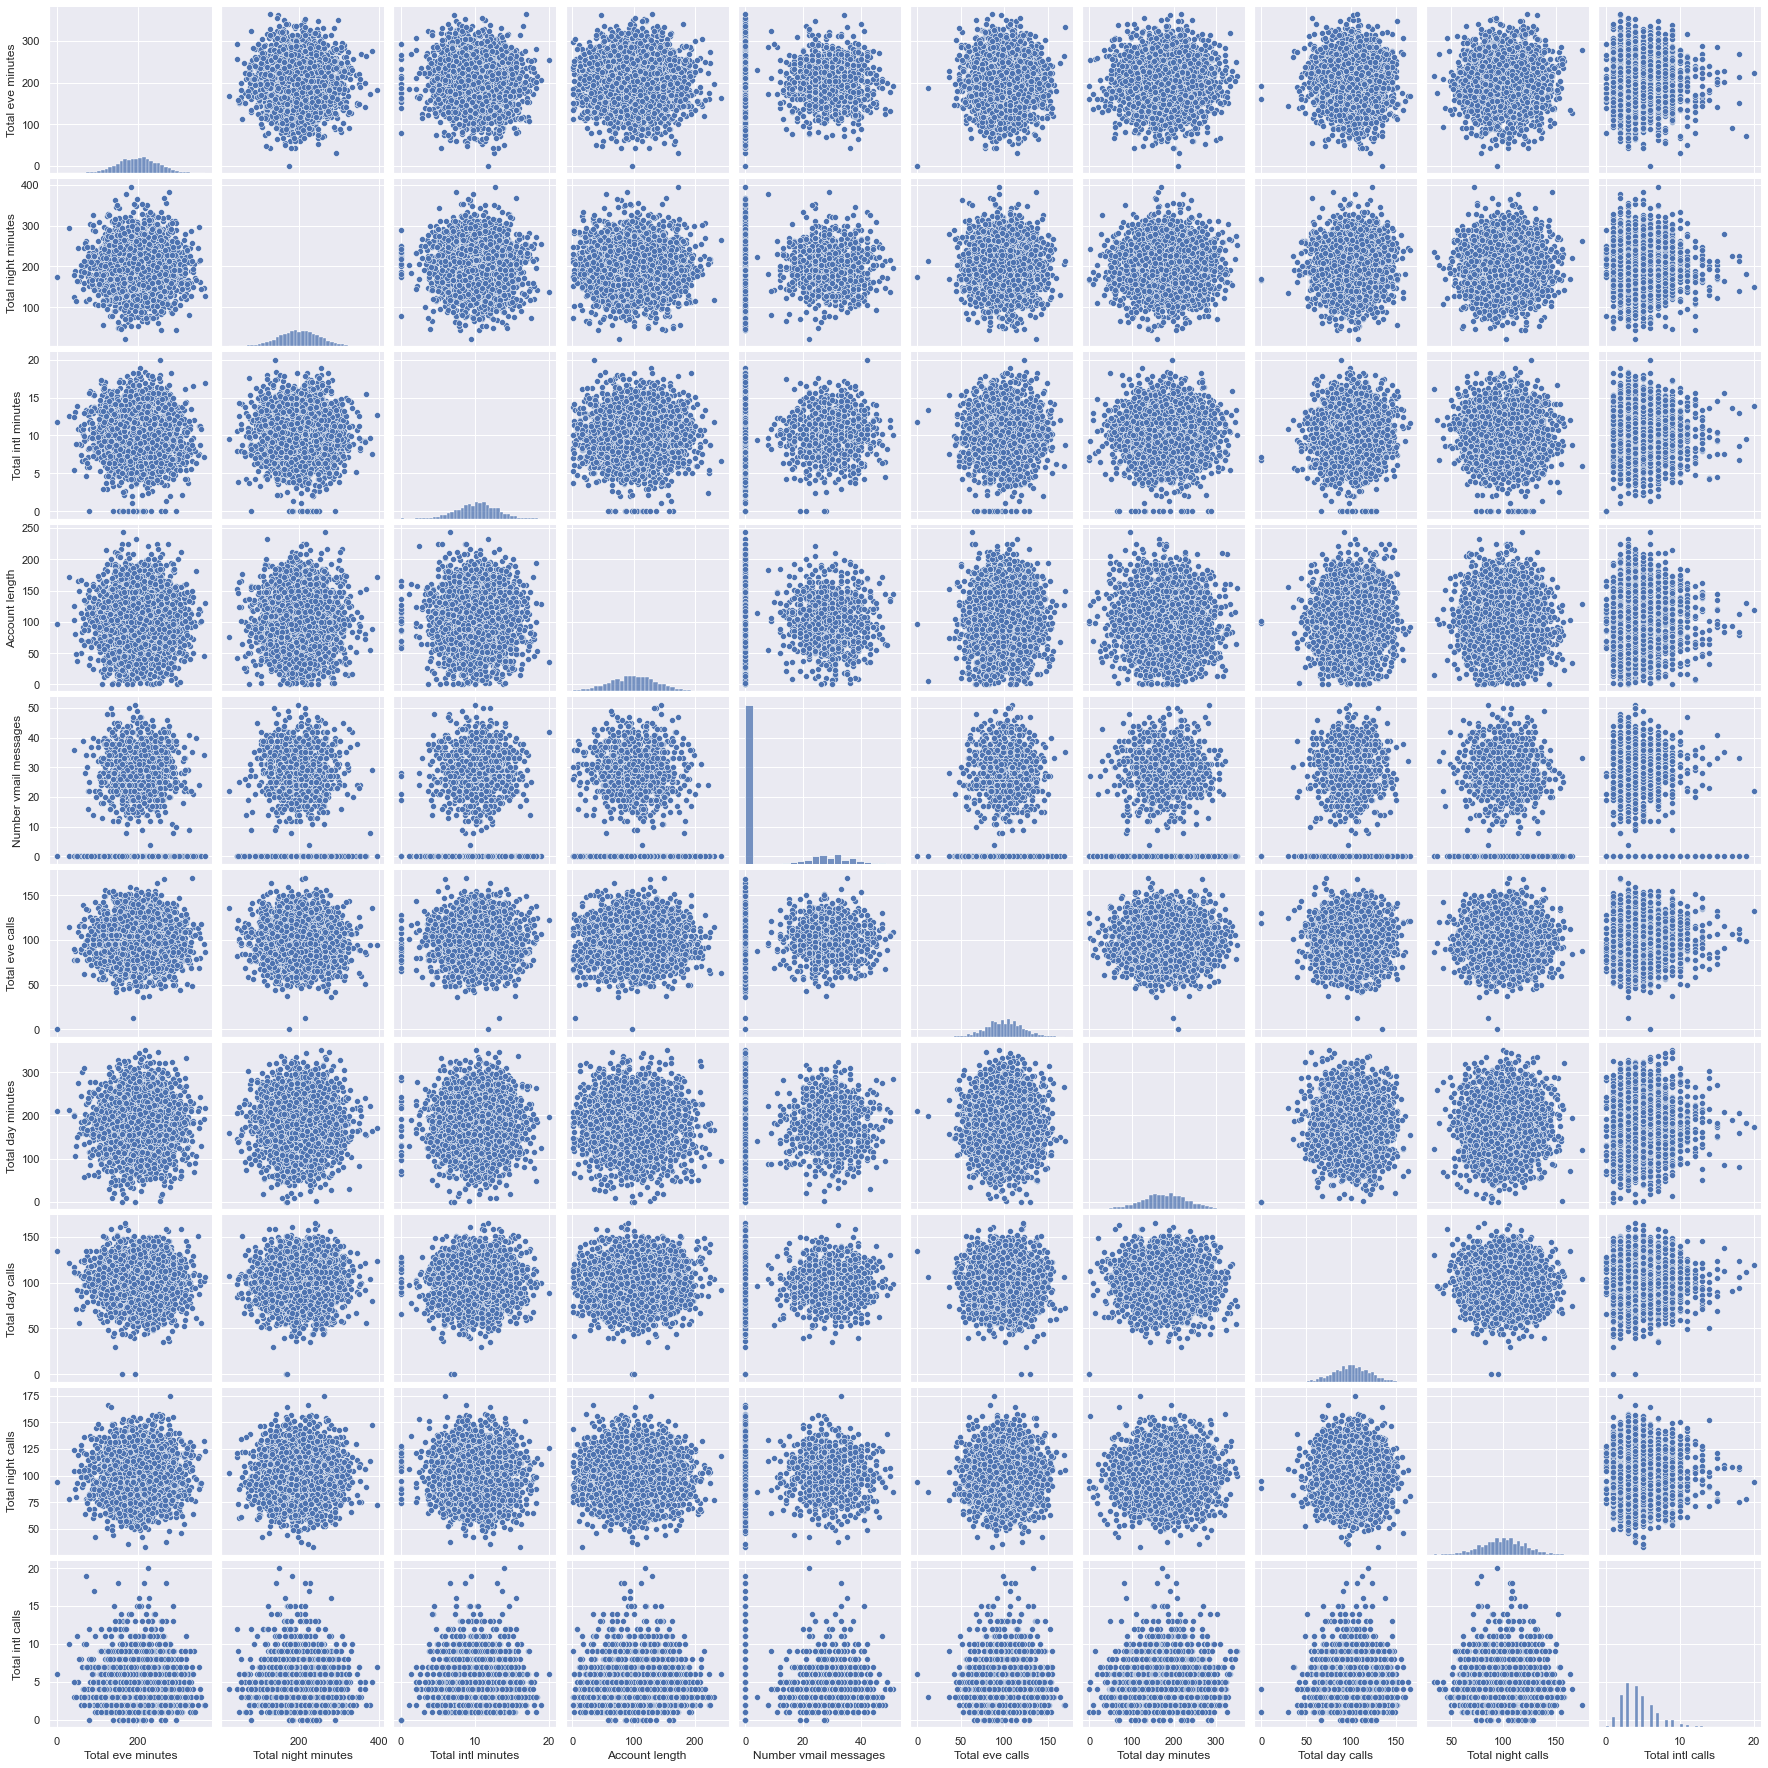

In [21]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);


#### 3.2 Количественные переменные vs Категориальные переменные



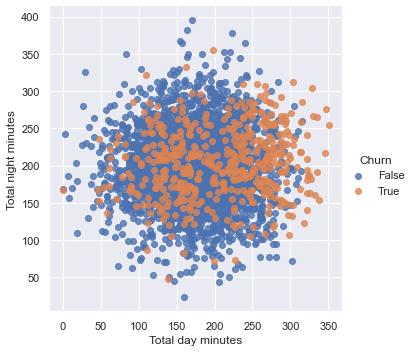

In [22]:
sns.lmplot(
    "Total day minutes", "Total night minutes", data=df, hue="Churn", fit_reg=False
);

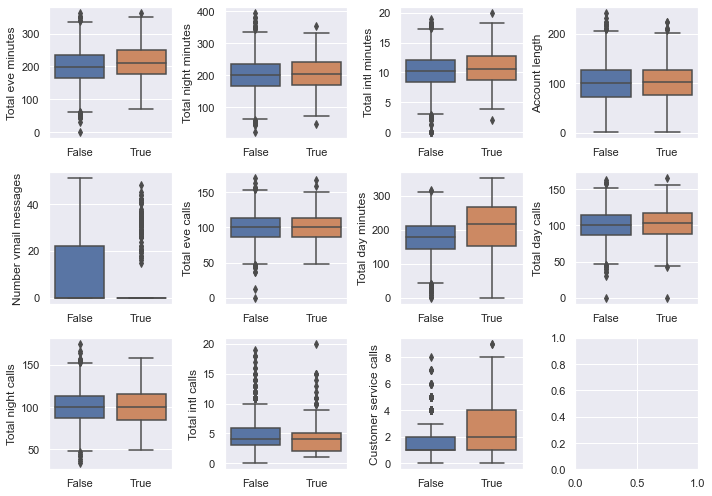

In [23]:

numerical.append("Customer service calls")

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x="Churn", y=feat, data=df, ax=ax)
    ax.set_xlabel("")
    ax.set_ylabel(feat)
fig.tight_layout();

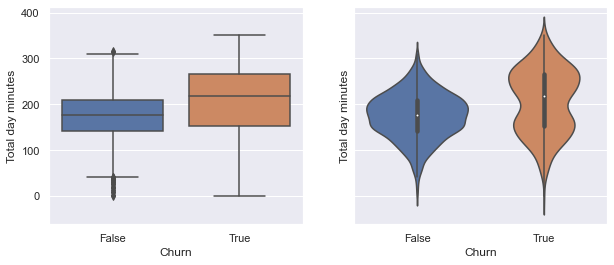

In [24]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x="Churn", y="Total day minutes", data=df, ax=axes[0])
sns.violinplot(x="Churn", y="Total day minutes", data=df, ax=axes[1]);

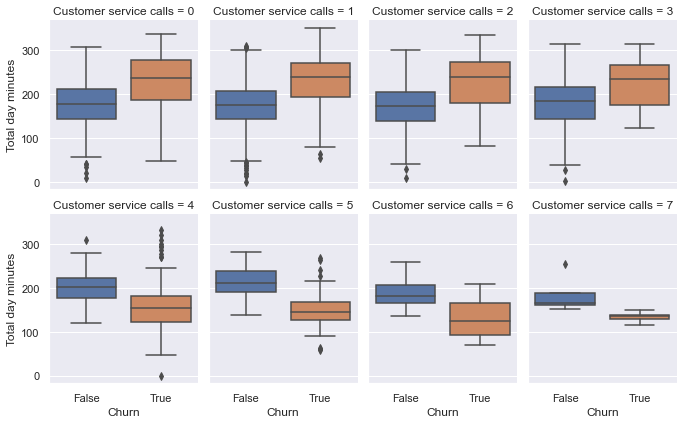

In [25]:
sns.catplot(
    x="Churn",
    y="Total day minutes",
    col="Customer service calls",
    data=df[df["Customer service calls"] < 8],
    kind="box",
    col_wrap=4,
    height=3,
    aspect=0.8,
);



#### 3.3 Категориальные переменные vs Категориальные переменные



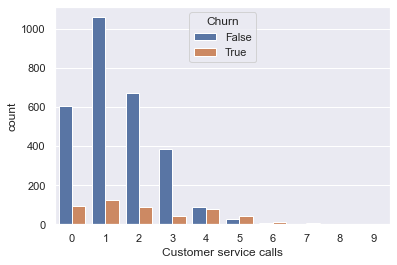

In [26]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);

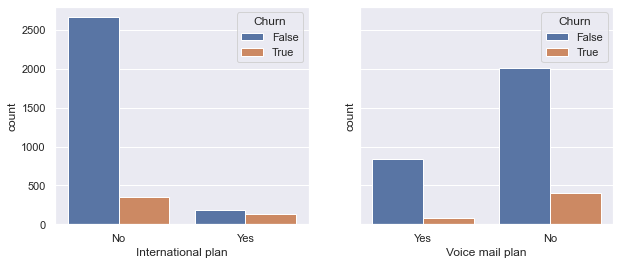

In [27]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x="International plan", hue="Churn", data=df, ax=axes[0])
sns.countplot(x="Voice mail plan", hue="Churn", data=df, ax=axes[1]);